In [1]:
import numpy as np
import cv2
import ImageView as iv
import eksplisitt as eks
import matplotlib.pyplot as plt
%matplotlib inline

lena = 'lena.png'
LFC = 'LFC.jpeg'

def detectFace(file, title, scaleFactor = 1.2, minNeighbors = 5):
    """
    Oppdager et ansikt vendt mot kamera
   
    Parameters + some explanation
    ---------
    file         : Bildefil
                    Pathen til filen der original bildet befinner seg uten andvending
    scaleFactor  : int
                    Kompenserer i tilfelle noen ansikter er nærmere kamera enn andre
    minNeighbors : int
                    spesifiserer antall naboer en rektangel bør ha for å bli kalt et "ansikt"
    title        : text
                    Tittelen på bildet som er anvendt
    """
    image = cv2.imread(file) #leser inn bildet
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') #importerer haarscade biblioteket
    faces = face_cascade.detectMultiScale(image, scaleFactor, minNeighbors, minSize = (30,30))
    for (x,y,w,h) in faces:
        RoI = image[y:y+h, x:x+w]                          #Region of Interest --> ansiktet
        RoI = RoI.astype(dtype = float)
        blur = eks.dirichlet(RoI, image[y:y+h, x:x+w], 0.25, 0, 250)                
        image[y:y+h, x:x+w] = blur
    
    print(len(faces), "er ansikt registrert")               #teller opp antall ansikt funnet og skriver de ut    
    iv.singleView(image,title)                              #displayer bildet

1 er ansikt registrert


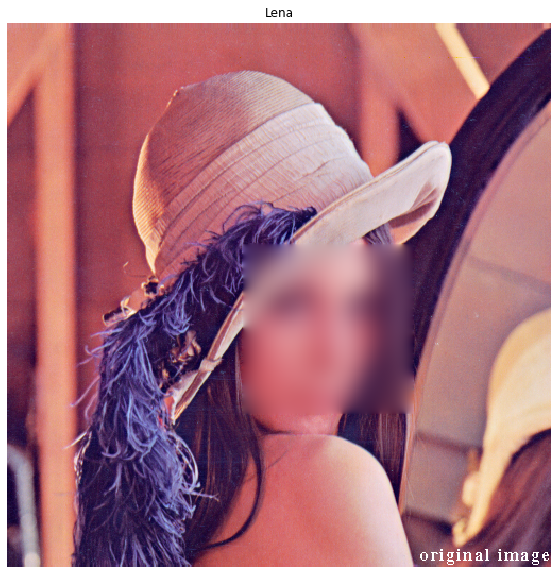

In [2]:
detectFace(lena, "Lena")

5 er ansikt registrert


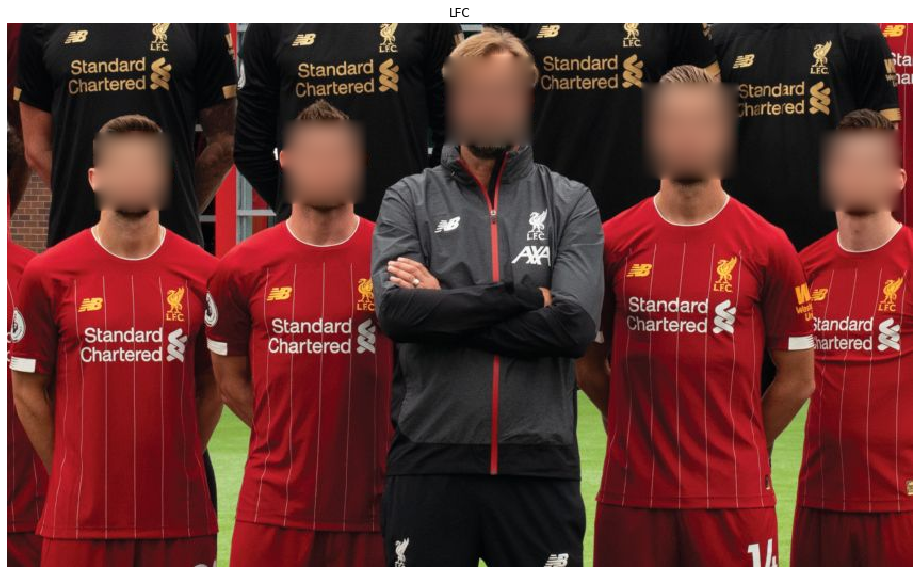

In [3]:
detectFace(LFC, "LFC")